## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


The first step is to read the data from the given file. We store the data into a variable named `office_data`

In [2]:
office_data = pd.read_csv('datasets/office_episodes.csv')

In [3]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


As we see from the summary above, there are 14 columns with 188 different data. There are no null values in any coulmn except the `guest_stars` where the null value represents episodes with no apperance of guests stars.

All the above columns appears to be of correct data type except for the `release_date` which should be of `datetime` type. We thus correct the type for this column.

In [4]:
office_data['release_date'] = pd.to_datetime(office_data['release_date'])

The scatter plot with `episode_number` on the horizonatal axis and `viewership_mil` on the vertical axis looks like.

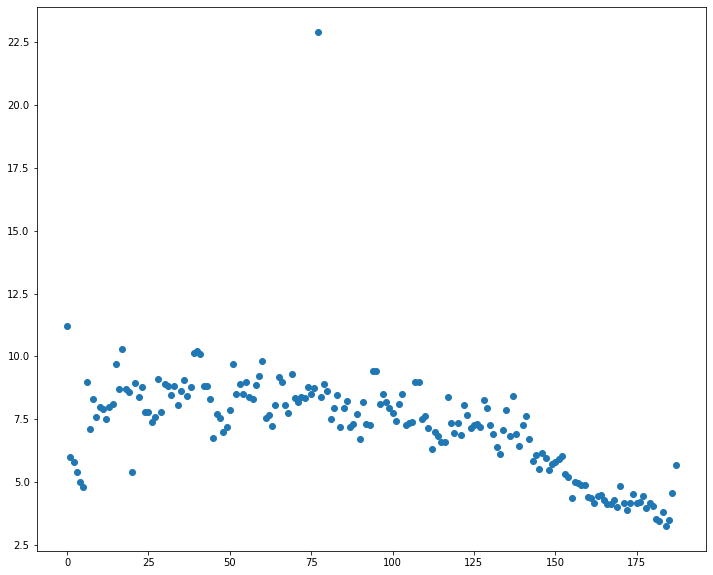

In [5]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data=office_data, x='episode_number',y='viewership_mil')
plt.show()

We now differentiate the episodes by their ratings. The `ratings` column contains data which rate each episode througth the scale of 1 to 10. So instead of using this scale, we differentiate the episodes through their scaled rating provided in the `scaled_ratings` columns.

The scaled rating defined here is the __normalized rating__ which is given as:

$ X^{'} = \frac{X - X_{min}}{X_{max} - X_{min}}$

where $X_{min}$ and $X_{max}$ represents the minimum and maximum value respectively.

The normalized rating (Scaled rating) has value between 0 and 1 which allows more efficient way for representing them. Using the scaled values, we assign various colors for various ratings defined as:
    * Rating< 0.25            Red
    * 0.25 >= Rating < 0.50   Orange
    * 0.50 >= Rating < 0.75   Lightgreen
    * 0.75 >= Rating          Darkgreen

To implement the above condition, we define a function `color_r` which takes in a value and assign the color to the value

In [6]:
def color_r(scale):
    if scale < 0.25: return 'red'
    elif (scale>= 0.25) & (scale<0.50): return 'orange'
    elif (scale>=0.50) & (scale<0.75): return 'lightgreen'
    elif (scale>=0.75): return 'darkgreen'

We then define a new column `color_rat` which takes in the color parameter assigned from the function defined above. The function is applied via the `apply` function in the `scaled_rating` column.

In [7]:
office_data['color_rat'] = office_data['scaled_ratings'].apply(color_r)

The preview of the entire DataFrame then looks like:

In [8]:
office_data.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,color_rat
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,orange
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,orange
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,orange
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,lightgreen


In [9]:
office_data['color_rat'].unique()

array(['orange', 'lightgreen', 'darkgreen', 'red'], dtype=object)

Lets now add color to the plot with the colors defined above and included in the column `color_rat` of the dataset.

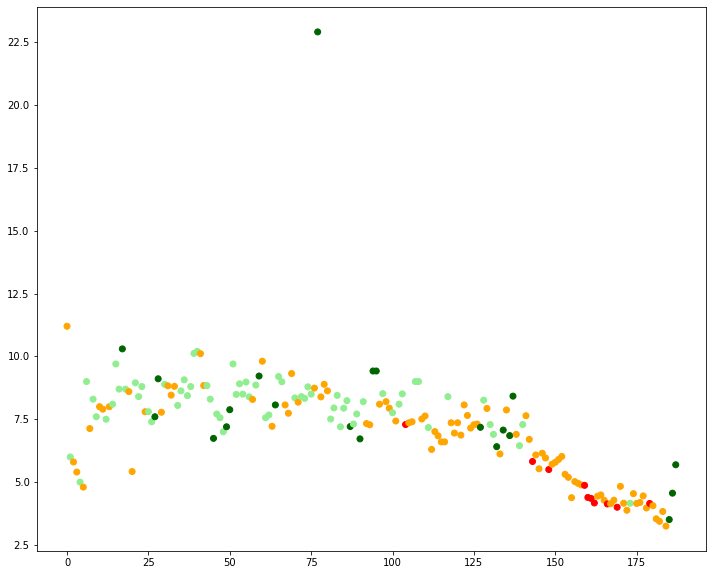

In [10]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data=office_data, x='episode_number',y='viewership_mil', c='color_rat')
plt.show()

Now to differentiate the plot with the size parameters for episodes with appearance of guest stars, we define a list which contains `bool` value from the `has_guests` column.

In [11]:
size = list(office_data['has_guests'])

Based on the values in the list size, we assign size of 25 if the value is `False` and a value of 250 if the value is `True`.

In [12]:
for i, val in enumerate(size):
    if val == True: size[i] = 250
    else: size[i] = 25

In [13]:
office_data['m_size'] = size

In [14]:
office_data['m_size'].unique()

array([ 25, 250])

Applying the different marker size defined above to our scatter plot.

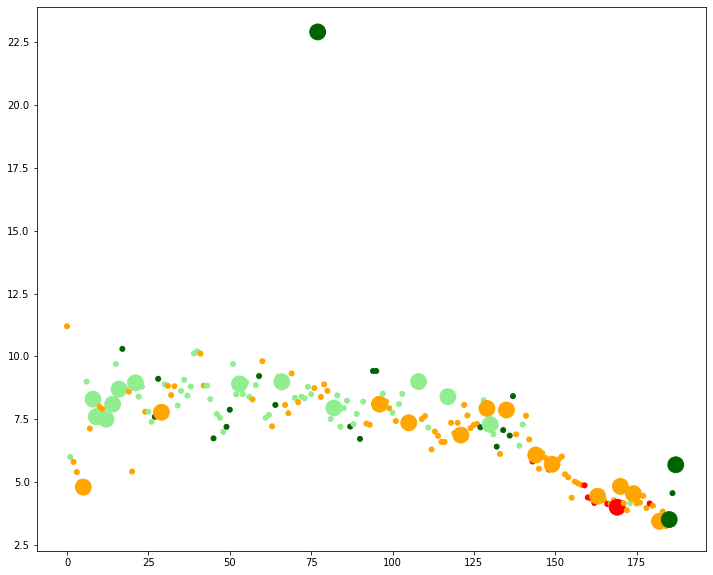

In [15]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data=office_data, x='episode_number',y='viewership_mil', c='color_rat', s='m_size')
plt.show()

Let's not change the marker style in addition to the marker size. In order to change the marker style, we need to pass the `marker` parameter to the scatter plot. But first, we need to separate the values from the `office_data` table.

For this we define two new tables: `has_guest` and `no_guest` and set the marker style to star `'*'` for episodes with guest start appearance.

In [16]:
has_guest = office_data[office_data['has_guests']==True]
no_guest = office_data[office_data['has_guests']==False]

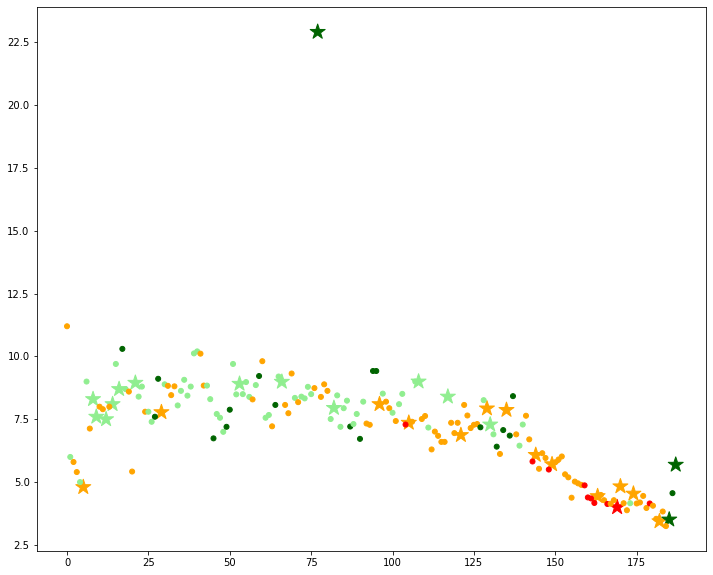

In [23]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data=has_guest, x='episode_number',y='viewership_mil', c='color_rat', s='m_size', marker='*')
plt.scatter(data=no_guest, x='episode_number',y='viewership_mil', c='color_rat', s='m_size', marker='o')
plt.show()

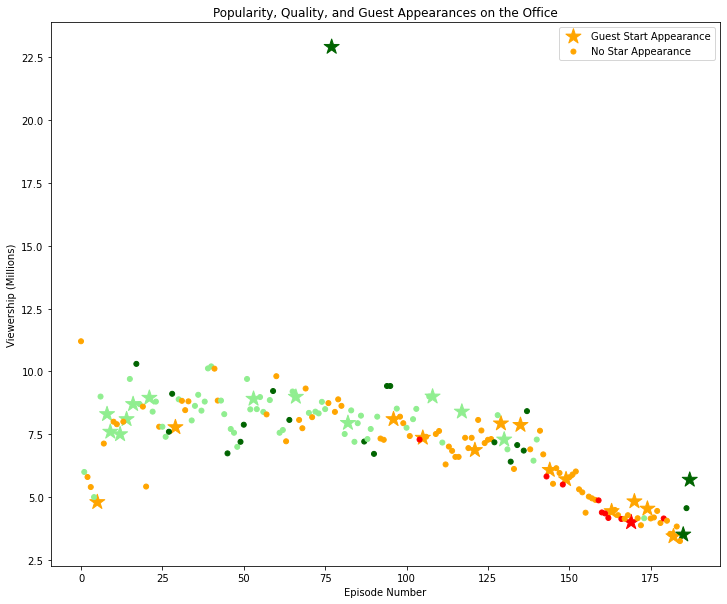

In [24]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data=has_guest, x='episode_number',y='viewership_mil', c='color_rat', s='m_size', marker='*',label='Guest Start Appearance')
plt.scatter(data=no_guest, x='episode_number',y='viewership_mil', c='color_rat', s='m_size', marker='o',label='No Star Appearance')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.legend()
plt.show()

If we look at the plot above, we see that the total viewers start to decrease as the series extends i.e. as the episode number gets larger. Also the appearance of the guest stars are more frequent for the later episodes.

Let's now see the guest start appearance for the most viewed episode of the series.

For this we first set the max value of the `viewership_mil` column.

In [25]:
x = office_data['viewership_mil'].max()

We now iterate through the rows of the DataFrame and for the maximum value of `viewership_mil` we extract the names of the guest stars. Since there are many appearance in a single episode, we spilit the value using the `str.split` function. This gives a list with the names of the stars.

In [26]:
for i, val in office_data.iterrows():
    if val['viewership_mil'] == x: 
        z=str(val['guest_stars'])
        y=z.split(',')

In [27]:
print(y)

['Cloris Leachman', ' Jack Black', ' Jessica Alba']


In [ ]:
top_star=y[0]